<div style="border: 2px solid RGB(200,150,100);" >
<div style="display: flex; font-family: Verdana; background-color: RGB(200,150,200);" >
  <h1 style="margin: auto; padding: 20px; "> Projet: SEGMENTATION DES CLIENTS DU SITE OLIST ! </h1>
</div>

<h2 style="padding: 10px; font-family: Verdana; "> Preprocessing and KMeans Clustering </h2>

### Sommaire
###  <a style="padding: 10px; font-family: Verdana; " href="#AF"> 1. Preprocessing </a>
###  <a style="padding: 10px; font-family: Verdana; " href="#F"> 2. Clustering </a>
###  <a style="padding: 10px; font-family: Verdana; " href="#FA"> 3. Analyse et interpretation des clusters </a>
</div>

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%config IPCompleter.greedy=True  
%matplotlib inline

In [2]:
# Option d'affichage
pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 100000)

In [3]:
#lecture des données 
df = pd.read_csv('df.csv')
rfm_results = pd.read_csv('rfm_results.csv')

In [4]:
df

,Unnamed: 0,customer_id,customer_unique_id,order_id,order_date,review_score,payment_sequential,payment_type,payment_installments,payment_value,freight_value,distance_clientVendeur,order_hour,order_day,order_weekday,order_month,order_year,purchase_weekend
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,4.0,1.0,credit_card,2.0,146.87,21.88,348.67,15,16,1,5,2017,0
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,5.0,1.0,credit_card,8.0,335.48,46.48,413.82,20,12,4,1,2018,0
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,5.0,1.0,credit_card,7.0,157.73,17.79,29.95,16,19,5,5,2018,1
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,5.0,1.0,credit_card,1.0,173.30,23.36,18.50,16,13,1,3,2018,0
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,5.0,1.0,credit_card,8.0,252.25,22.25,220.06,9,29,6,7,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115718,118681,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,4.0,1.0,credit_card,6.0,88.78,13.88,357.88,15,7,5,4,2018,1
115719,118682,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,5.0,1.0,credit_card,3.0,129.06,14.16,251.15,8,4,2,4,2018,0
115720,118683,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,1.0,1.0,credit_card,5.0,56.04,19.04,2367.08,20,8,6,4,2018,1
115721,118684,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,5.0,1.0,credit_card,2.0,711.07,22.07,999.04,21,3,4,11,2017,0


In [5]:
rfm_results

,Unnamed: 0,customer_unique_id,recence,frequence,montant,R,F,M,categorie
0,0,0000366f3b9a7992bf8c76cfdf3221e2,234,1,141.90,4,1,3,Client potentiel
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,237,1,27.19,4,1,1,Client potentiel
2,2,0000f46a3911fa3c0805444483337064,660,1,86.22,1,1,2,Client perdu
3,3,0000f6ccb0745a6a4b88665a16c9f078,444,1,43.62,2,1,1,Others
4,4,0004aac84e0df4da2b147fca70cf8255,411,1,196.89,2,1,3,Others
...,...,...,...,...,...,...,...,...,...
93353,93353,fffcf5a5ff07b0908bd4e2dbc735a684,570,1,4134.84,1,1,4,Others
93354,93354,fffea47cd6d3cc0a88bd621562a9d061,385,1,84.58,2,1,2,Others
93355,93355,ffff371b4d645b6ecea244b27531430a,691,1,112.46,1,1,2,Client perdu
93356,93356,ffff5962728ec6157033ef9805bacc48,242,1,133.69,3,1,3,Client potentiel


<div style="border: 1px solid RGB(200,150,100);" >
    <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> <a id="AF"> 1. Prétraitement des données: Preprocessing </a></h3>
</div>

In [6]:
#recupérer les données interessantes pour l'analyse des clients

finaldf = df[['customer_id', 'customer_unique_id', 'order_date',

       'review_score', 'payment_sequential', 'payment_type',

       'payment_installments', 'payment_value', 'freight_value',

         'distance_clientVendeur']]

finaldf.shape

(115723, 10)

In [7]:
#merger finaldf avec rfm_results pour recuperer RFM

finaldf = finaldf.merge(rfm_results, how="left", on ='customer_unique_id')

finaldf = finaldf.drop(columns=['R', 'F', 'M', 'categorie', 'Unnamed: 0'])

finaldf.columns

Index(['customer_id', 'customer_unique_id', 'order_date', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'freight_value', 'distance_clientVendeur', 'recence',
       'frequence', 'montant'],
      dtype='object')

In [8]:
finaldf

,customer_id,customer_unique_id,order_date,review_score,payment_sequential,payment_type,payment_installments,payment_value,freight_value,distance_clientVendeur,recence,frequence,montant
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,4.0,1.0,credit_card,2.0,146.87,21.88,348.67,593,1,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,5.0,1.0,credit_card,8.0,335.48,46.48,413.82,352,1,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,5.0,1.0,credit_card,7.0,157.73,17.79,29.95,225,1,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,5.0,1.0,credit_card,1.0,173.30,23.36,18.50,292,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,5.0,1.0,credit_card,8.0,252.25,22.25,220.06,154,1,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115718,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,4.0,1.0,credit_card,6.0,88.78,13.88,357.88,267,1,88.78
115719,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,5.0,1.0,credit_card,3.0,129.06,14.16,251.15,270,1,129.06
115720,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,1.0,1.0,credit_card,5.0,56.04,19.04,2367.08,266,1,56.04
115721,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,5.0,1.0,credit_card,2.0,711.07,22.07,999.04,422,1,711.07


### a) Encodage de la variables qualitatives "payment_type" 

In [9]:
# Encodage de la variable 'payment_type'


ohe = OneHotEncoder()

codes = ohe.fit_transform(finaldf[['payment_type']]).toarray()

feature_names = ohe.get_feature_names(['pay'])

select = [x for x in finaldf.columns if x != 'payment_type']

finaldf = pd.concat([finaldf.loc[:, select], pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)
finaldf

,customer_id,customer_unique_id,order_date,review_score,payment_sequential,payment_installments,payment_value,freight_value,distance_clientVendeur,recence,frequence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,4.0,1.0,2.0,146.87,21.88,348.67,593,1,146.87,0,1,0,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,5.0,1.0,8.0,335.48,46.48,413.82,352,1,335.48,0,1,0,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,5.0,1.0,7.0,157.73,17.79,29.95,225,1,157.73,0,1,0,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,5.0,1.0,1.0,173.30,23.36,18.50,292,1,173.30,0,1,0,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,5.0,1.0,8.0,252.25,22.25,220.06,154,1,252.25,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115718,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,4.0,1.0,6.0,88.78,13.88,357.88,267,1,88.78,0,1,0,0
115719,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,5.0,1.0,3.0,129.06,14.16,251.15,270,1,129.06,0,1,0,0
115720,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,1.0,1.0,5.0,56.04,19.04,2367.08,266,1,56.04,0,1,0,0
115721,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,5.0,1.0,2.0,711.07,22.07,999.04,422,1,711.07,0,1,0,0


### b) Regroupement des données

Puisque customer_id est dupliqué (customer_id = 98816 et customer_unique_id = 95560), nous allons regrouper par l'identifiant unique du client et agréger toutes les autres features.

A noter que customer_unique_id englobe les clients qui n'ont pas commandé et customer_id représente uniquement les clients qui ont commandés. Un client peut commander plusieurs fois ce qui explique la duplication customer_id.

Pour ce faire, nous proposons, et pour chaque clée unique du client, de moyenner les variables numériques telque 'montant' et 'reactivité'. Pour les variables de valeur binaire, qui sont les variables générées de l'encodage des variables qualitatives et la variable 'evaluateur', je propose de calculer leur somme.

In [10]:
#regrouper par l'identifiant unique du customer

df_agg = finaldf.groupby(['customer_unique_id'], as_index = False).agg({

                                                                        'review_score' : 'mean',

                                                                        'payment_sequential' : 'mean',

                                                                        'payment_installments' : 'mean',

                                                                        'payment_value' : 'sum',

                                                                        'freight_value' : 'mean',                                                                       

                                                                        'distance_clientVendeur' : 'mean',

                                                                        'frequence': 'count',

                                                                        'recence': 'min',

                                                                        'montant': 'sum',                                                                                                                                           

                                                                        'pay_boleto': 'sum', 

                                                                        'pay_credit_card' : 'sum',

                                                                        'pay_debit_card' : 'sum',

                                                                        'pay_voucher' : 'sum', 
                                                                                                                                                                                      

                                                                  })

df_agg.head(20)

,customer_unique_id,review_score,payment_sequential,payment_installments,payment_value,freight_value,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1.0,8.0,141.90,12.00,110.53,1,234,141.90,0,1,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1.0,1.0,27.19,8.29,22.23,1,237,27.19,0,1,0,0
2,0000f46a3911fa3c0805444483337064,3.0,1.0,8.0,86.22,17.22,517.02,1,660,86.22,0,1,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,1.0,4.0,43.62,17.63,2481.24,1,444,43.62,0,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,5.0,1.0,6.0,196.89,16.89,154.52,1,411,196.89,0,1,0,0
5,0004bd2a26a76fe21f786e4fbd80607f,4.0,1.0,8.0,166.98,12.98,27.26,1,269,166.98,0,1,0,0
6,00050ab1314c0e55a6ca13cf7181fecf,4.0,1.0,1.0,35.38,7.39,101.46,1,254,35.38,1,0,0,0
7,00053a61a98854899e70ed204dd4bafe,1.0,1.0,3.0,838.36,18.59,503.50,2,305,1676.72,0,2,0,0
8,0005e1862207bf6ccc02e4228effd9a0,4.0,1.0,3.0,150.12,15.12,246.86,1,666,150.12,0,1,0,0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1.0,1.0,4.0,129.76,24.86,2250.49,1,293,129.76,0,1,0,0


### c) Standardisation  

Dans cette partie nous allons standardiser les variables qui sont à la base numériques ainsi que les variables qualitatives que nous avons encodées. Rappelons que lorsqu'on a regroupé les variables encodées, nous avons employé la fonction 'somme'. Ainsi, nous avons calculé le nombre de fois qu'un client a acheté une certaine catégorie, et le nombre de fois qu'il a réglé par chaque moyen de payement. D'où, on ne dispose plus de valeurs binaires mais de valeurs numériques. Nous allons donc les standardiser pour respecter les distances entre les échatillons. 

In [11]:
#pour avoir une idée sur les min et max des variables encodées puis sommées
df_agg.describe()

,review_score,payment_sequential,payment_installments,payment_value,freight_value,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher
count,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000
mean,4.153654,1.022958,2.900274,213.017355,20.184364,602.392619,1.239562,360.478888,475.596457,0.241061,0.914490,0.017802,0.066208
std,1.280104,0.185721,2.677071,646.407801,15.708550,592.527347,0.849072,152.595050,6721.948040,0.580560,0.746543,0.154568,0.565567
min,1.000000,1.000000,0.000000,9.590000,0.000000,0.000000,1.000000,123.000000,10.070000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,63.830000,13.370000,191.560000,1.000000,237.000000,64.842500,0.000000,1.000000,0.000000,0.000000
50%,5.000000,1.000000,2.000000,113.140000,16.390000,435.765000,1.000000,341.000000,116.940000,0.000000,1.000000,0.000000,0.000000
75%,5.000000,1.000000,4.000000,202.647500,21.190000,799.863333,1.000000,469.000000,227.395000,0.000000,1.000000,0.000000,0.000000
max,5.000000,13.500000,24.000000,109312.640000,409.680000,3399.250000,75.000000,836.000000,905120.000000,20.000000,24.000000,7.000000,75.000000


In [12]:
#selectionner les variables à standardiser
varsToStandardize = df_agg.iloc[: , 1::].columns


#nous choisissons le standardisateur le plus basique, nous supposons que nous avons pas d'outliers
scaler = StandardScaler()

#standardiser uniquement les variables quantitatives
df_agg[varsToStandardize] = scaler.fit_transform(df_agg[varsToStandardize])

df_agg.head()

,customer_unique_id,review_score,payment_sequential,payment_installments,payment_value,freight_value,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher
0,0000366f3b9a7992bf8c76cfdf3221e2,0.661158,-0.123619,1.904975,-0.110020,-0.521016,-0.830114,-0.282147,-0.828858,-0.049643,-0.415225,0.114541,-0.115176,-0.117064
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.120033,-0.123619,-0.709837,-0.287479,-0.757194,-0.979137,-0.282147,-0.809198,-0.066708,-0.415225,0.114541,-0.115176,-0.117064
2,0000f46a3911fa3c0805444483337064,-0.901223,-0.123619,1.904975,-0.196158,-0.188711,-0.144083,-0.282147,1.962860,-0.057926,-0.415225,0.114541,-0.115176,-0.117064
3,0000f6ccb0745a6a4b88665a16c9f078,-0.120033,-0.123619,0.410797,-0.262061,-0.162611,3.170921,-0.282147,0.547341,-0.064264,-0.415225,0.114541,-0.115176,-0.117064
4,0004aac84e0df4da2b147fca70cf8255,0.661158,-0.123619,1.157886,-0.024949,-0.209719,-0.755872,-0.282147,0.331081,-0.041462,-0.415225,0.114541,-0.115176,-0.117064


C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

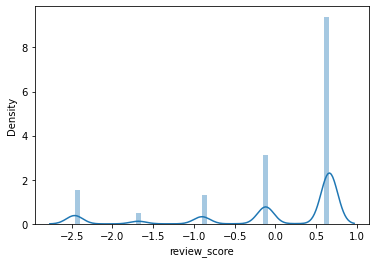

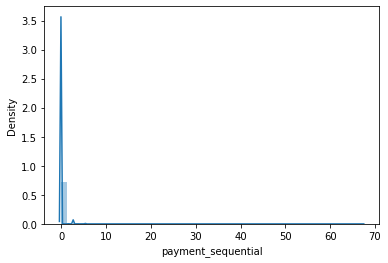

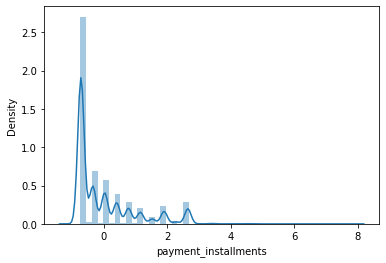

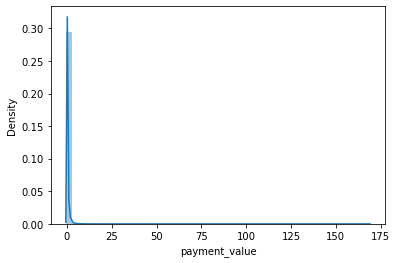

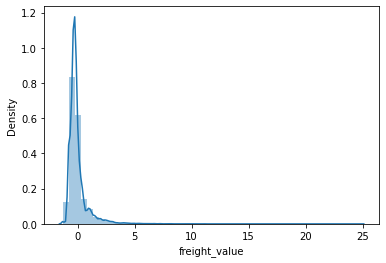

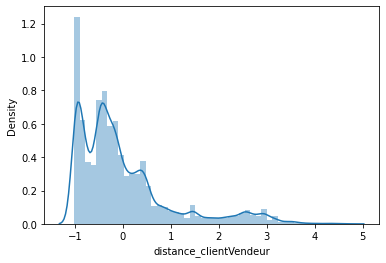

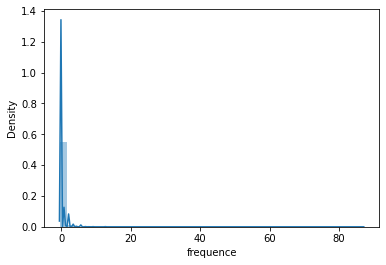

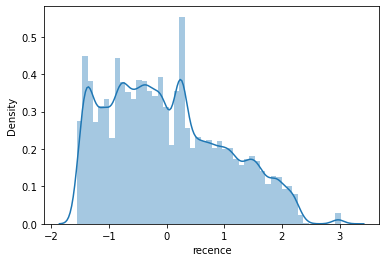

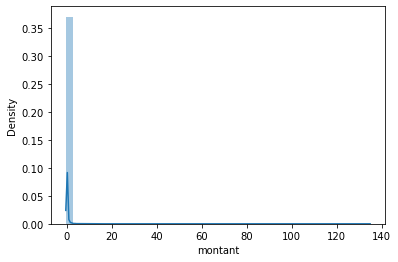

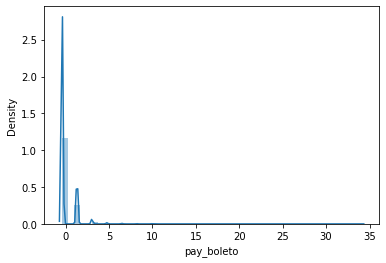

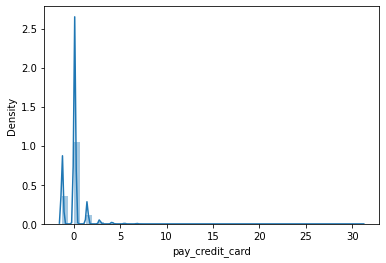

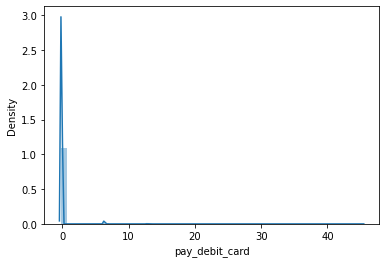

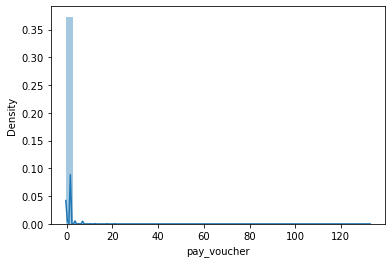

In [28]:
for col in df_agg.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_agg[col])

<div style="border: 1px solid RGB(200,150,100);" >
    <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> <a id="AF"> 2. Clustering </a></h3>
</div>

Afin de trouver le nombre de clusters idéal, la stratégie est la suivante:  
- 1. Commencer par les features RFM et rajouter/modifier à chaque test un feature.  
- 2. Pour chaque groupe de features, chercher les différentes possibilités de nombre de clusters idéal à l'aide de méthode Elbow.  
- 3. Pour chaque nombre de cluster possible, calculer sa silhouette ainsi que le nombre de clients qu'il englobe.  
- 4. Nous allons choisir le nombre de cluster qui avec un maximum de features, on réalise un compromis entre coefficient de silhouette et entre des clusters assez remplis. Comme hypothèse, nous éliminons la segmentation dont la taille de l'un de ses clusters est inférieur à 500 clients



### a) 1er test: Segmentation baser uniquement sur les features RFM

In [14]:
#Nous allons travailler pour le moment qu'avec les features RFM déjà standardisés

data_rfm = df_agg[['frequence','recence','montant']]

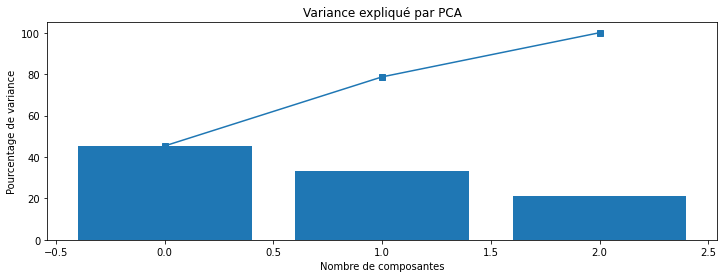

In [15]:
# Appliquons PCA sur cette partie de dataframe

pca = PCA()

data_rfm_pca = pca.fit_transform(data_rfm)

#Affichage graphique

fig = plt.figure(1, figsize=(12, 4))

plt.bar(range(len(pca.explained_variance_ratio_)), 100*pca.explained_variance_ratio_)

plt.ylim(0, 1.05*100)

plt.plot(range(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_), "s-")

plt.ylabel("Pourcentage de variance")

plt.xlabel("Nombre de composantes")

plt.title("Variance expliqué par PCA")

plt.show()

--> On atteint 100% de variance à partir de 3 composantes, nous allons donc garder toutes nos variables car ils sont tous significatives.

#### Recherche graphique de n-clusters : Elbow Method

Text(0, 0.5, 'cout du modèle(inertia)')

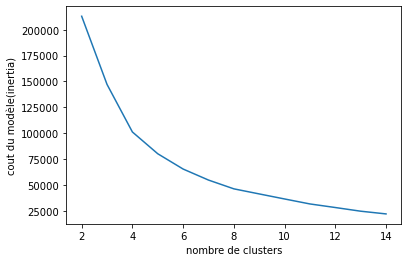

In [16]:
# test des valeurs de K (2 a 15)
inertia = []
k_range = range(2,15)
for k in k_range:
    model = KMeans(n_clusters = k).fit(data_rfm)
    inertia.append(model.inertia_)

plt.plot(k_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('cout du modèle(inertia)')

--> D'après ce graphe, nous constatons que la zone de coude n'est pas très précise, mais elle indique quand même que le nombre idéal de clusters est entre 3 et 6.
Nous allons chercher le nombre de cluster idéal parmi 3,4, 5 ou 6 par une autre méthode mathématique: coefficient de silhouette.


#### Recherche mathématique de n_clusters : coefficient de silhouette

    - Le coefficient de silhouette permet d'évaluer si un point x appartient au « bon » cluster : est-il proche des points du cluster auquel il appartient ? Est-il loin des autres points ?
    - Le coefficient de silhouette est compris entre -1 et 1, et d'autant plus proche de 1 que l'assignation de x à son cluster est satisfaisante.

In [17]:
# CODE SOURCE SCIKIT LEARN

def kmeans_inspection(X, range_n_clusters):

    for n_clusters in range_n_clusters:

        # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 1)
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.gca()

        #fig.set_size_inches(18, 7)
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])

        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)
        frame = pd.DataFrame(X)
        #pred = kmeans.predict(extend2_rfm)
        frame['cluster'] = cluster_labels
        print(
            "For n_clusters =", n_clusters,
            
            "\ntaille des clusters\n", 
            frame['cluster'].value_counts())

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print(
            "\nFor n_clusters =", n_clusters,

            "The average silhouette_score is :",round(silhouette_avg, 3),
           )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        
        for i in range(n_clusters):

            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

For n_clusters = 3 
taille des clusters
 2    51762
1    26032
0    15564
Name: cluster, dtype: int64

For n_clusters = 3 The average silhouette_score is : 0.554
For n_clusters = 4 
taille des clusters
 0    51762
1    37862
2     3727
3        7
Name: cluster, dtype: int64

For n_clusters = 4 The average silhouette_score is : 0.603
For n_clusters = 5 
taille des clusters
 1    51762
0    37862
3     3659
4       70
2        5
Name: cluster, dtype: int64

For n_clusters = 5 The average silhouette_score is : 0.61


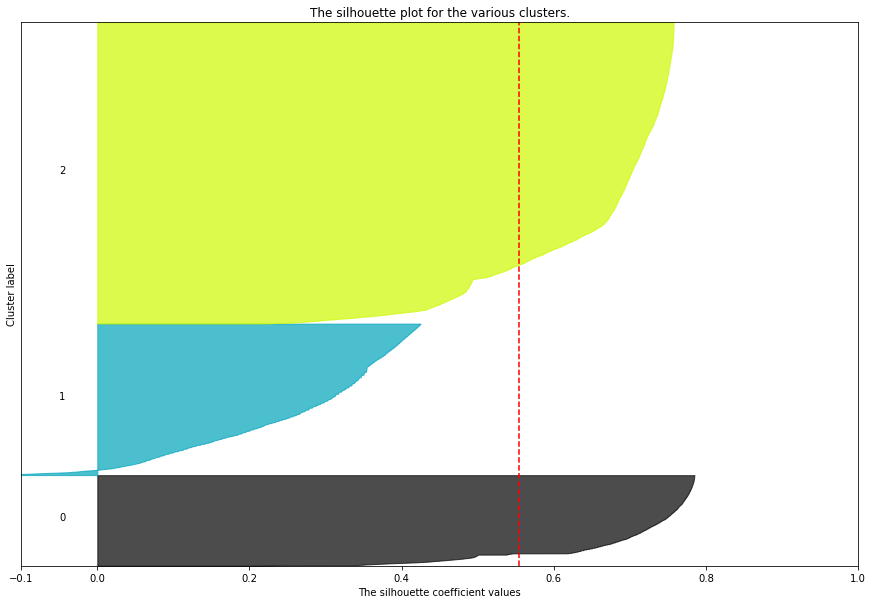

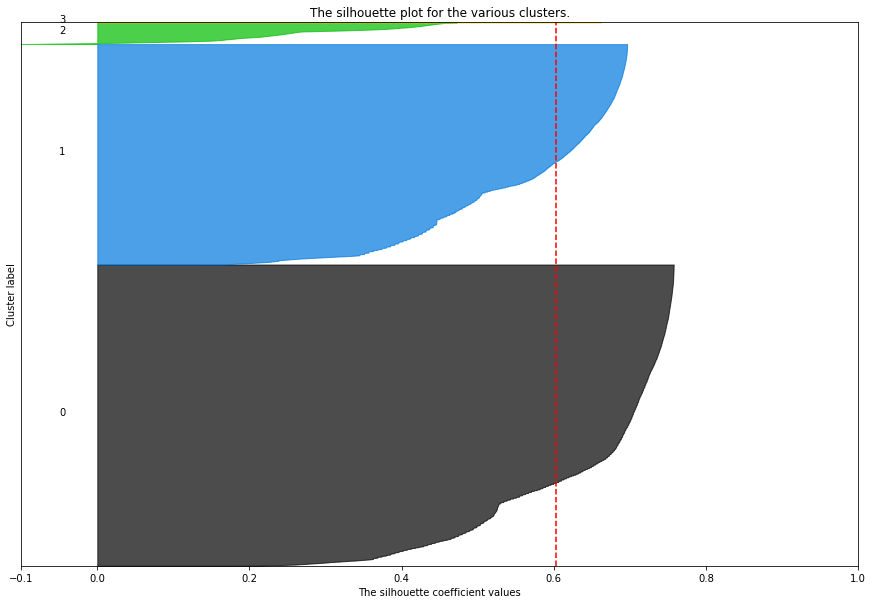

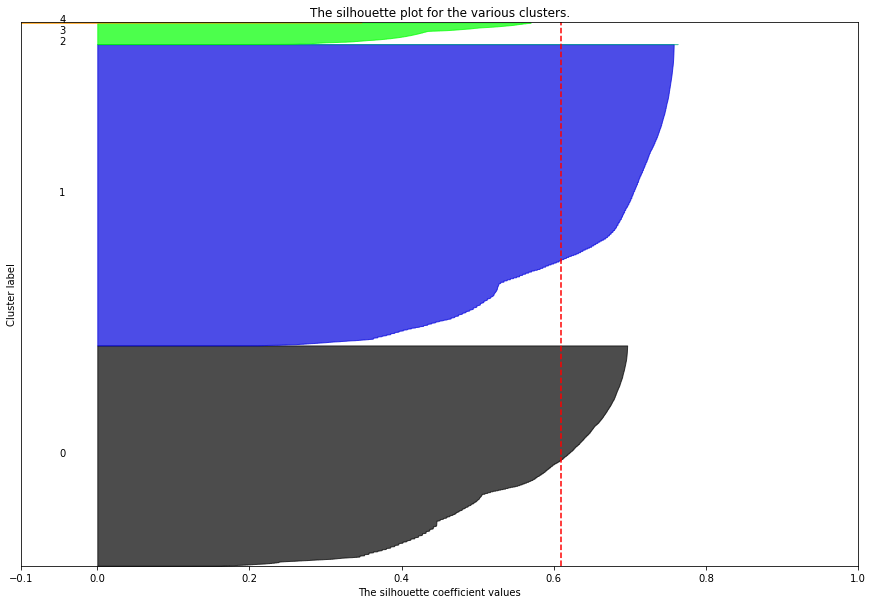

In [23]:
# Execution de la fonction
range_n_clusters = [3,4,5]
kmeans_inspection(data_rfm, range_n_clusters)

**Interprétation:**

Nous remarquons que pour k= 3, on n'atteint pas le plus grand coefficient de silhouette mais un meilleur equilibre au niveau des classes. Pour celà, les clusters ne sont pas de tailles assez proches. 

**Etudions tout de meme le contenu de cluster pour k=3**

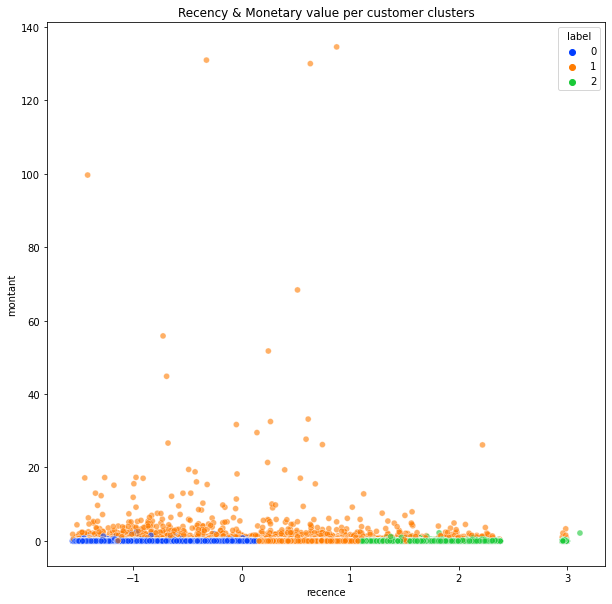

In [22]:
# Recence & Montant des clients par cluster
data_3 = data_rfm.copy()
model3 = KMeans(n_clusters = 3).fit(data_rfm)
data_3['label'] = model3.labels_
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_3, x='recence', y='montant', hue='label', palette='bright', alpha=0.6)
plt.title('Recency & Monetary value per customer clusters')
plt.show()

In [20]:
data_3['label'].value_counts()

0    51762
1    26032
2    15564
Name: label, dtype: int64

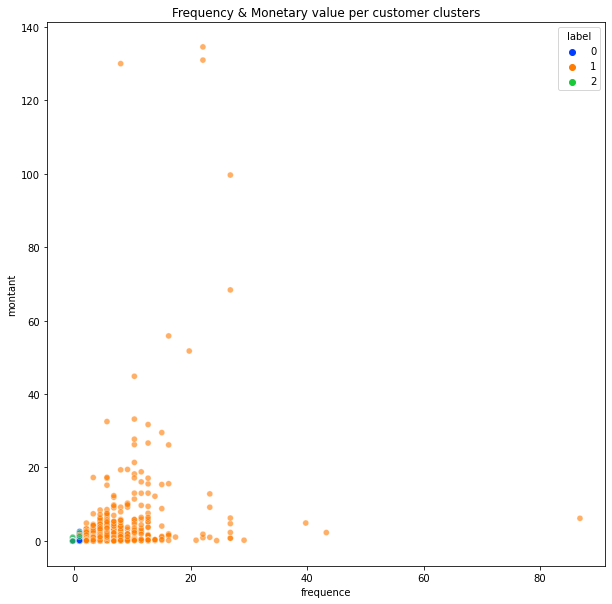

In [24]:
# Frequence & Montant des clients par cluster
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_3, x='frequence', y='montant', hue='label', palette='bright', alpha=0.6)
plt.title('Frequency & Monetary value per customer clusters')
plt.show()

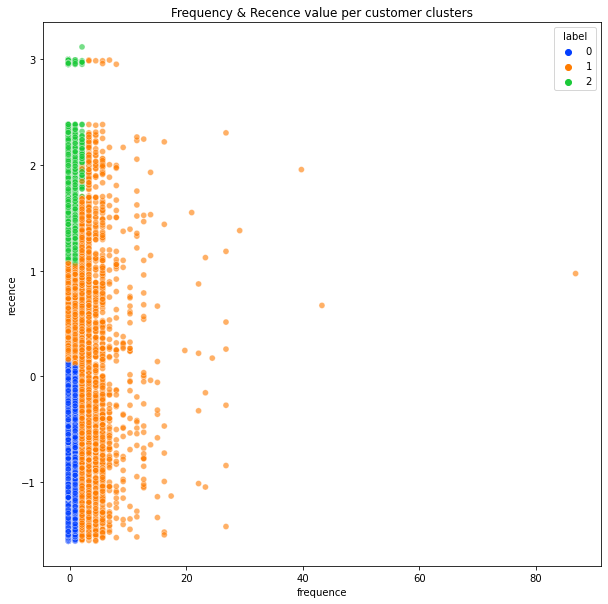

In [29]:
# Frequence & Recence des clients par cluster
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_3, x='frequence', y='recence', hue='label', palette='bright', alpha=0.6)
plt.title('Frequency & Recence value per customer clusters')
plt.show()

In [30]:
# Observation des variables par cluster
df_clusterRFM = (
    data_3.groupby('label').agg(
        Recency=("recence", np.mean),
        Frequency=("frequence", np.mean),
        Monetary=("montant", np.mean),
           ))

<AxesSubplot:ylabel='label'>

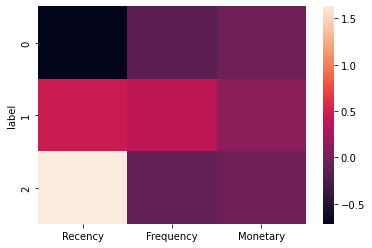

In [32]:
sns.heatmap(data=df_clusterRFM)

**Conclusion Segmentation KMeans avec les features RFM**
- Cluster 0: clients ayant achete recemment avec des montants moyens ;
- Cluster 1: clients ayant achete plusieurs fois mais n'ayant pas fait d'achat depuis un certain temps ;
- Cluster 2: clients n'ayant pas fait d'achat depuis plusieurs mois.

### b) 2e test: Segmentation basee sur les features selectionees

In [76]:
# Exclusion de la colonne customer_unique_id
df_clus = df_agg[['review_score', 'distance_clientVendeur', 'frequence',
       'recence', 'montant', 'pay_boleto', 'pay_credit_card', 'pay_debit_card',
       'pay_voucher']]

# df_clus = df_clus[df_clus['montant']<=20]
df_clus

,review_score,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher
0,0.661158,-0.830114,-0.282147,-0.828858,-0.049643,-0.415225,0.114541,-0.115176,-0.117064
1,-0.120033,-0.979137,-0.282147,-0.809198,-0.066708,-0.415225,0.114541,-0.115176,-0.117064
2,-0.901223,-0.144083,-0.282147,1.962860,-0.057926,-0.415225,0.114541,-0.115176,-0.117064
3,-0.120033,3.170921,-0.282147,0.547341,-0.064264,-0.415225,0.114541,-0.115176,-0.117064
4,0.661158,-0.755872,-0.282147,0.331081,-0.041462,-0.415225,0.114541,-0.115176,-0.117064
...,...,...,...,...,...,...,...,...,...
93353,0.661158,2.352760,0.895616,1.373060,1.159504,-0.415225,1.454055,-0.115176,-0.117064
93354,-0.120033,1.560708,-0.282147,0.160695,-0.058170,-0.415225,0.114541,-0.115176,-0.117064
93355,0.661158,1.558953,-0.282147,2.166013,-0.054023,-0.415225,0.114541,-0.115176,-0.117064
93356,0.661158,0.059791,-0.282147,-0.776431,-0.050864,-0.415225,0.114541,-0.115176,-0.117064


In [58]:
df_clus.columns

Index(['review_score', 'payment_sequential', 'payment_installments',
       'payment_value', 'freight_value', 'distance_clientVendeur', 'frequence',
       'recence', 'montant', 'pay_boleto', 'pay_credit_card', 'pay_debit_card',
       'pay_voucher', 'cluster'],
      dtype='object')

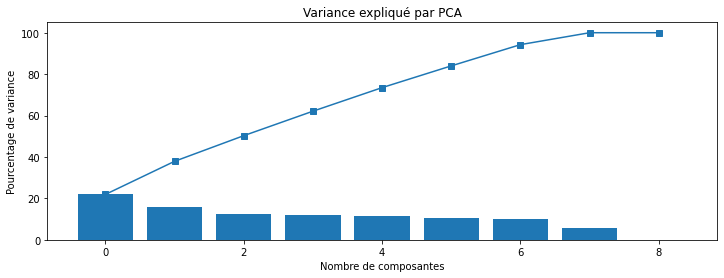

In [79]:
# Appliquons PCA sur cette partie de dataframe

pca = PCA()

df_clus_pca = pca.fit_transform(df_clus)

#Affichage graphique

fig = plt.figure(1, figsize=(12, 4))

plt.bar(range(len(pca.explained_variance_ratio_)), 100*pca.explained_variance_ratio_)

plt.ylim(0, 1.05*100)

plt.plot(range(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_), "s-")

plt.ylabel("Pourcentage de variance")

plt.xlabel("Nombre de composantes")

plt.title("Variance expliqué par PCA")

plt.show()

In [61]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_clus)

In [62]:
#verifier le nombre de composantes après compression
pca.n_components_

8

#### Méthode Elbow pour la recherche du nombre de cluster

In [63]:
inertia = []
k_range = range(2,15)
for k in k_range:
    model = KMeans(n_clusters = k).fit(df_clus)
    inertia.append(model.inertia_)

Text(0, 0.5, 'cout du modèle(inertia)')

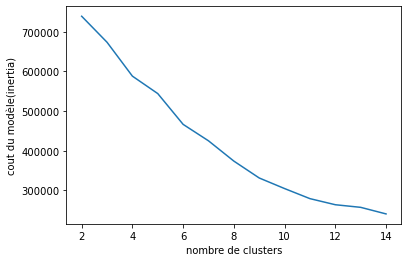

In [64]:
plt.plot(k_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('cout du modèle(inertia)')

--> D'après ce graphe, nous constatons que la zone de coude n'est pas très précise, mais elle indique quand même que le nombre idéal de clusters est entre 3 et 6.
Nous allons chercher le nombre de cluster idéal parmi 4, 5, 6 et 7 par une autre méthode mathématique: coefficient de silhouette.

#### Recherche plus fine du nombre de cluster avec le Coefficient de silhouette

For n_clusters = 5 
taille des clusters
 1    39719
0    30723
2    18578
4     2869
3     1469
Name: cluster, dtype: int64

For n_clusters = 5 The average silhouette_score is : 0.295
For n_clusters = 6 
taille des clusters
 2    37962
1    21909
3    20045
5    10574
0     2861
4        7
Name: cluster, dtype: int64

For n_clusters = 6 The average silhouette_score is : 0.322


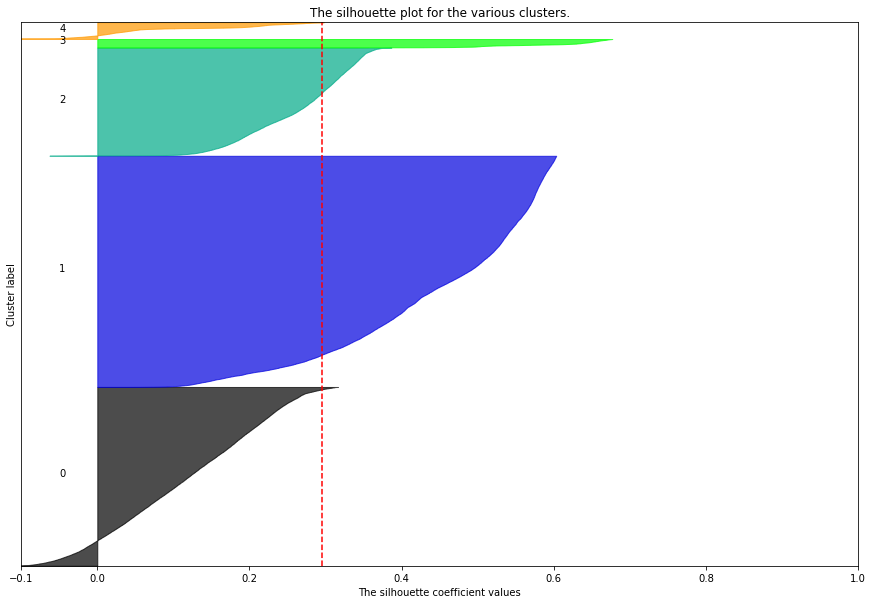

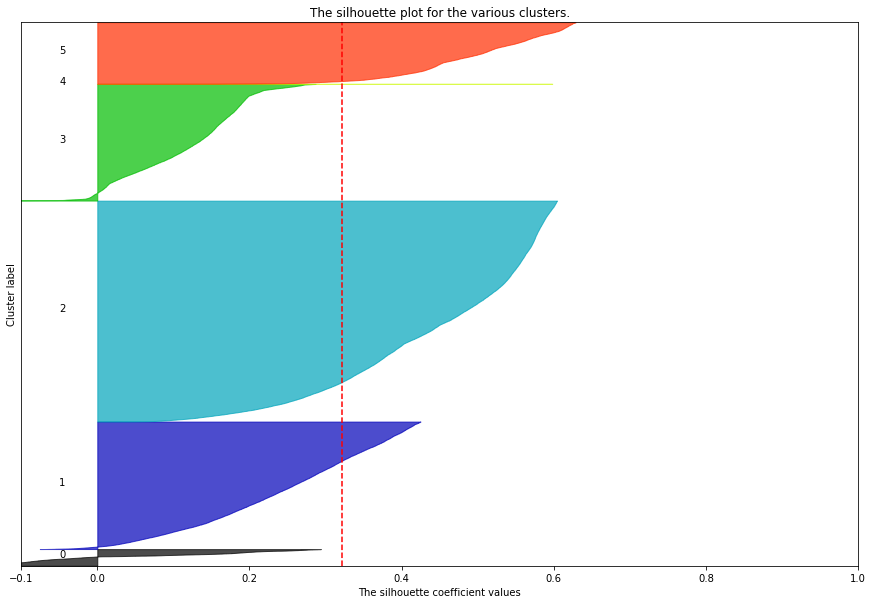

In [80]:
# Execution de la fonction
range_n_clusters = [5,6]
kmeans_inspection(df_clus, range_n_clusters)

###### Choix final du nombre de clusters K

Après plusieurs tests effectués, Nous choisissons les features qui nous permettent d'assurer un compromis entre coefficient de silhouette et nombre de clients dans chaque cluster. Le nombre de cluster choisi est K=4.


<div style="border: 1px solid RGB(200,150,100);" >
    <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> <a id="FA"> 3. Analyse et interpretation des clusters </a></h3>
</div>

In [116]:
# Entrainons KMeans avec k = 5
df_clus1 = df_clus.iloc[ : , :-1]
model = KMeans(n_clusters= 4 )
cluster_labels = model.fit_predict(df_clus1)
#cluster_labels
frame = df_clus1.copy()
#pred = kmeans.predict(extend2_rfm)
frame['cluster'] = cluster_labels

In [117]:
frame['cluster'].value_counts()

1    70177
0    18642
3     3070
2     1469
Name: cluster, dtype: int64

In [120]:
frame

,review_score,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,cluster
0,0.661158,-0.830114,-0.282147,-0.828858,-0.049643,-0.415225,0.114541,-0.115176,-0.117064,1
1,-0.120033,-0.979137,-0.282147,-0.809198,-0.066708,-0.415225,0.114541,-0.115176,-0.117064,1
2,-0.901223,-0.144083,-0.282147,1.962860,-0.057926,-0.415225,0.114541,-0.115176,-0.117064,1
3,-0.120033,3.170921,-0.282147,0.547341,-0.064264,-0.415225,0.114541,-0.115176,-0.117064,1
4,0.661158,-0.755872,-0.282147,0.331081,-0.041462,-0.415225,0.114541,-0.115176,-0.117064,1
...,...,...,...,...,...,...,...,...,...,...
93353,0.661158,2.352760,0.895616,1.373060,1.159504,-0.415225,1.454055,-0.115176,-0.117064,1
93354,-0.120033,1.560708,-0.282147,0.160695,-0.058170,-0.415225,0.114541,-0.115176,-0.117064,1
93355,0.661158,1.558953,-0.282147,2.166013,-0.054023,-0.415225,0.114541,-0.115176,-0.117064,1
93356,0.661158,0.059791,-0.282147,-0.776431,-0.050864,-0.415225,0.114541,-0.115176,-0.117064,1


In [126]:
# Séparons les données des clusters
df_cluster0 = frame[frame['cluster']==0]
df_cluster1 = frame[frame['cluster']==1]
df_cluster2 = frame[frame['cluster']==2]
df_cluster3 = frame[frame['cluster']==3]

#### Premier cluster **Cluster 0**

In [129]:
df_cluster0

,review_score,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,cluster
6,-0.120033,-0.845421,-0.282147,-0.697791,-0.065490,1.307261,-1.224973,-0.115176,-0.117064,0
11,0.661158,-0.622561,-0.282147,0.298315,-0.051970,1.307261,-1.224973,-0.115176,-0.117064,0
13,-0.120033,0.476533,-0.282147,-0.717451,-0.058547,1.307261,-1.224973,-0.115176,-0.117064,0
20,0.661158,-0.815296,-0.282147,-1.503850,-0.066625,1.307261,-1.224973,-0.115176,-0.117064,0
22,0.661158,-0.078508,3.251142,-1.333464,0.791811,6.474718,-1.224973,-0.115176,-0.117064,0
...,...,...,...,...,...,...,...,...,...,...
93334,0.661158,-0.321493,-0.282147,-0.730558,-0.059929,1.307261,-1.224973,-0.115176,-0.117064,0
93346,0.661158,2.584194,5.606668,-1.176184,15.165769,9.919689,-1.224973,-0.115176,-0.117064,0
93347,-0.120033,-0.148893,-0.282147,0.816028,-0.062571,1.307261,-1.224973,-0.115176,-0.117064,0
93350,0.661158,-0.262070,-0.282147,0.429381,-0.058673,1.307261,-1.224973,-0.115176,-0.117064,0


C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_core.py:1326: Use

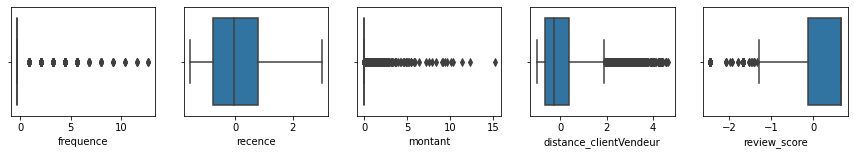

In [128]:
#boxplots
fig = plt.figure(1, figsize=(15, 2))

# Boxplot de la variable Frequence
plt.subplot(151)
sns.boxplot(df_cluster0["frequence"], orient="vertical")

# Boxplot de la variable recence
plt.subplot(152)
sns.boxplot(df_cluster0["recence"], orient="vertical")

# Boxplot de la variable Monetary
plt.subplot(153)
sns.boxplot(df_cluster0["montant"], orient="vertical")

# Boxplot de la variable distance_clientVendeur
plt.subplot(154)
sns.boxplot(df_cluster0["distance_clientVendeur"], orient="vertical")

# Boxplot de la variable review_score
plt.subplot(155)
sns.boxplot(df_cluster0["review_score"], orient="vertical")

plt.show()

--> les clients qui ne sont pas satisfaits (leur review score est faible)

#### Deuxieme cluster **Cluster 1**

In [130]:
df_cluster1

,review_score,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,cluster
0,0.661158,-0.830114,-0.282147,-0.828858,-0.049643,-0.415225,0.114541,-0.115176,-0.117064,1
1,-0.120033,-0.979137,-0.282147,-0.809198,-0.066708,-0.415225,0.114541,-0.115176,-0.117064,1
2,-0.901223,-0.144083,-0.282147,1.962860,-0.057926,-0.415225,0.114541,-0.115176,-0.117064,1
3,-0.120033,3.170921,-0.282147,0.547341,-0.064264,-0.415225,0.114541,-0.115176,-0.117064,1
4,0.661158,-0.755872,-0.282147,0.331081,-0.041462,-0.415225,0.114541,-0.115176,-0.117064,1
...,...,...,...,...,...,...,...,...,...,...
93353,0.661158,2.352760,0.895616,1.373060,1.159504,-0.415225,1.454055,-0.115176,-0.117064,1
93354,-0.120033,1.560708,-0.282147,0.160695,-0.058170,-0.415225,0.114541,-0.115176,-0.117064,1
93355,0.661158,1.558953,-0.282147,2.166013,-0.054023,-0.415225,0.114541,-0.115176,-0.117064,1
93356,0.661158,0.059791,-0.282147,-0.776431,-0.050864,-0.415225,0.114541,-0.115176,-0.117064,1


C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_core.py:1326: Use

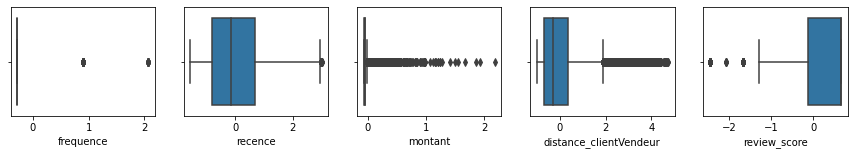

In [131]:
#boxplots
fig = plt.figure(1, figsize=(15, 2))

# Boxplot de la variable Frequence
plt.subplot(151)
sns.boxplot(df_cluster1["frequence"], orient="vertical")

# Boxplot de la variable recence
plt.subplot(152)
sns.boxplot(df_cluster1["recence"], orient="vertical")

# Boxplot de la variable Monetary
plt.subplot(153)
sns.boxplot(df_cluster1["montant"], orient="vertical")

# Boxplot de la variable distance_clientVendeur
plt.subplot(154)
sns.boxplot(df_cluster1["distance_clientVendeur"], orient="vertical")

# Boxplot de la variable review_score
plt.subplot(155)
sns.boxplot(df_cluster1["review_score"], orient="vertical")

plt.show()

#### Troisieme cluster (cluster2)

In [134]:
df_cluster2

,review_score,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,cluster
103,0.661158,-0.890365,-0.282147,-0.514298,-0.032200,-0.415225,-1.224973,6.354510,-0.117064,2
118,-1.682414,-0.147880,0.895616,1.982520,-0.005867,-0.415225,-1.224973,12.824195,-0.117064,2
161,0.661158,-0.236957,-0.282147,-1.090991,-0.042446,-0.415225,-1.224973,6.354510,-0.117064,2
300,0.661158,0.031218,-0.282147,-0.724004,-0.050113,-0.415225,-1.224973,6.354510,-0.117064,2
308,-0.120033,-0.204249,-0.282147,1.871113,-0.056588,-0.415225,-1.224973,6.354510,-0.117064,2
339,0.661158,-0.289663,-0.282147,-1.267931,-0.052382,-0.415225,-1.224973,6.354510,-0.117064,2
594,0.661158,-0.759670,-0.282147,-1.090991,-0.054078,-0.415225,-1.224973,6.354510,-0.117064,2
656,-1.682414,-0.953316,-0.282147,0.029628,-0.059184,-0.415225,-1.224973,6.354510,-0.117064,2
734,0.661158,0.342361,-0.282147,0.265548,-0.064862,-0.415225,-1.224973,6.354510,-0.117064,2
755,-0.120033,-1.011153,-0.282147,-1.457977,0.050159,-0.415225,-1.224973,6.354510,-0.117064,2


C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_core.py:1326: Use

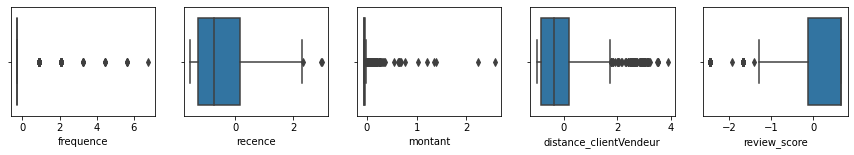

In [132]:
#boxplots
fig = plt.figure(1, figsize=(15, 2))

# Boxplot de la variable Frequence
plt.subplot(151)
sns.boxplot(df_cluster2["frequence"], orient="vertical")

# Boxplot de la variable recence
plt.subplot(152)
sns.boxplot(df_cluster2["recence"], orient="vertical")

# Boxplot de la variable Monetary
plt.subplot(153)
sns.boxplot(df_cluster2["montant"], orient="vertical")

# Boxplot de la variable distance_clientVendeur
plt.subplot(154)
sns.boxplot(df_cluster2["distance_clientVendeur"], orient="vertical")

# Boxplot de la variable review_score
plt.subplot(155)
sns.boxplot(df_cluster2["review_score"], orient="vertical")

plt.show()

#### Quatrieme cluster (cluster3)

In [135]:
df_cluster3

,review_score,distance_clientVendeur,frequence,recence,montant,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,cluster
199,-1.682414,-0.165061,2.073379,-0.173525,0.604684,-0.415225,2.793569,-0.115176,-0.117064,3
222,-2.463604,-0.606646,3.251142,1.936647,1.762630,-0.415225,4.133083,-0.115176,-0.117064,3
227,-2.463604,-0.993370,6.784431,-0.691238,1.588577,-0.415225,8.151626,-0.115176,-0.117064,3
248,0.661158,0.860872,3.251142,-0.494638,0.083608,-0.415225,0.114541,-0.115176,5.187372,3
257,-2.463604,-0.578030,4.428905,-0.828858,0.956150,-0.415225,5.472598,-0.115176,-0.117064,3
...,...,...,...,...,...,...,...,...,...,...
93187,-1.161620,0.875358,2.073379,0.252441,0.106375,-0.415225,2.793569,-0.115176,-0.117064,3
93205,0.140364,-0.370875,2.073379,0.730834,-0.008449,-0.415225,2.793569,-0.115176,-0.117064,3
93233,-2.463604,-0.820055,2.073379,1.497574,0.375825,-0.415225,2.793569,-0.115176,-0.117064,3
93265,-0.120033,-1.007710,3.251142,0.265548,0.236207,-0.415225,4.133083,-0.115176,-0.117064,3


C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_core.py:1326: Use

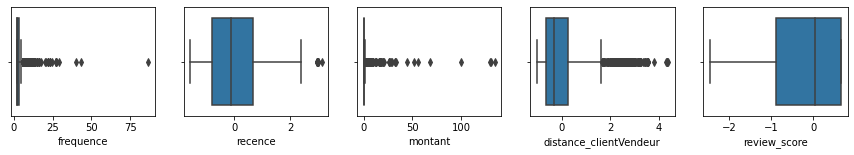

In [133]:
#boxplots
fig = plt.figure(1, figsize=(15, 2))

# Boxplot de la variable Frequence
plt.subplot(151)
sns.boxplot(df_cluster3["frequence"], orient="vertical")

# Boxplot de la variable recence
plt.subplot(152)
sns.boxplot(df_cluster3["recence"], orient="vertical")

# Boxplot de la variable Monetary
plt.subplot(153)
sns.boxplot(df_cluster3["montant"], orient="vertical")

# Boxplot de la variable distance_clientVendeur
plt.subplot(154)
sns.boxplot(df_cluster3["distance_clientVendeur"], orient="vertical")

# Boxplot de la variable review_score
plt.subplot(155)
sns.boxplot(df_cluster3["review_score"], orient="vertical")

plt.show()

In [137]:
# Observation des variables par cluster
df_clustering = (
    frame.groupby('cluster').agg(
        Recency=("recence", np.mean),
        Frequency=("frequence", np.mean),
        Monetary=("montant", np.mean),
        Distance=('distance_clientVendeur', np.mean),
        Review=("review_score", np.mean),
        pay_boleto=('pay_boleto', np.mean),
        pay_credit_card=('pay_credit_card', np.mean),
        pay_debit_card=('pay_debit_card', np.mean),
        pay_voucher=('pay_voucher', np.mean)
             
        
           ))

In [138]:
df_clustering

,Recency,Frequency,Monetary,Distance,Review,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher
cluster,,,,,,,,,
0,0.061757,-0.040681,-0.006703,0.015443,0.001629,1.643313,-1.213620,-0.115176,-0.114504
1,-0.007026,-0.140769,-0.038021,-0.000025,0.012373,-0.414832,0.218569,-0.115176,-0.042536
2,-0.464615,-0.084918,-0.029994,-0.122171,0.070390,-0.387083,-1.198529,7.200105,-0.115861
3,0.007917,3.505493,0.924165,-0.034739,-0.326416,-0.310866,2.946719,-0.113069,1.723074


<AxesSubplot:ylabel='cluster'>

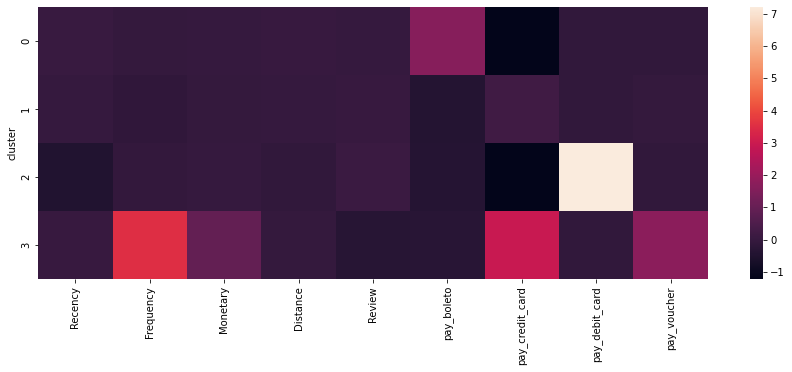

In [142]:
fig = plt.figure(1, figsize=(15, 5))
sns.heatmap(data=df_clustering)

**Conclusion generale**
- Cluster 0: Les clients achetent plus par le type de payement boleto et pour des montant faibles ;
- Cluster 1: Les clients achetent majoritairement par credit cart et sont globalement satisfaits ;
- Cluster 2: Les clients achetent par debit carte et ils n'ont pas effectue un achat depuis longtemps ;
- Cluster 3: Les clients achetent le plus par credit carte, ils ont effectues plusieurs achats pour des montant eleves et sont generalement insatisfaits.